# MACHINE LEARNING USE CASES (CHURN)

# Nigeria Telecoms Churn Dataset
 
Predict the likelihood of churn among mobile telephone subscribers using a balanced dataset

## Customer churn prediction

Churn prediction, or the task of identifying customers who are likely to discontinue use of a service, is an important and lucrative concern of firms in many different industries. As these firms collect an increasing amount of large-scale, heterogeneous data on the characteristics and behaviors of customers, new methods become possible for predicting churn. 

**Who should receive extra attention from customer service to secure their loyalty?**

**On average, keeping existing customers is five times cheaper than the cost of recruiting new ones. As a result, marketing executives often find themselves trying to estimate the likelihood of customer churn and finding the necessary actions to minimize the churn rate.**

<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="6" color="orange"><b>Predicting telecom customer churn with Apache Spark</b></th>
  <tr style="border: none">
       <th style="border: none"><img src="https://github.com/pmservice/wml-sample-models/blob/master/spark/customer-satisfaction-prediction/images/users_banner_2-03.png?raw=true" width="600" alt="Icon"> </th>
   </tr>
</table>

Apache Spark has become one of the most commonly used and supported open-source tools for machine learning and data science.

Apache Spark, once a component of the Hadoop ecosystem, is now becoming the big-data platform of choice for enterprises. It is a powerful open source engine that provides real-time stream processing, interactive processing, graph processing, in-memory processing as well as batch processing with very fast speed, ease of use and standard interface.

In [2]:
#!jps

In [18]:
#spark
from time import time

# Build the model
t0 = time()

In [17]:
# Disable warnings, set Matplotlib inline plotting and loading Pandas package
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

%matplotlib inline


In [5]:
pwd

'/home/javeed/JupyterNotebook*/Jupyter_Projects/AM_CHURN_Prediction'

In [2]:
spark

In [3]:
sc.stop()

# Loading Nigeria Telcom dataset

In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
#sc= SparkContext()
#sqlContext = SQLContext(sc)

CV_data = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('TRAIN.csv')

In [3]:
test_data = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('TEST.csv')

In [4]:
print("Data size instance is {}".format(CV_data.count()))

Data size instance is 1401


In [5]:
print("Number of Columns: %3g" % len(CV_data.schema))

Number of Columns:  16


In [6]:
df_complete = CV_data.dropna()

print("Number of records with complete data: %3g" % df_complete.count())

Number of records with complete data: 1202


In [9]:
CV_data.groupBy('Churn Status').count().show()

+------------+-----+
|Churn Status|count|
+------------+-----+
|        null|    1|
|           1|  700|
|           0|  700|
+------------+-----+



Now we will inspect distribution of classes in label column.

In [8]:
CV_data.cache()
CV_data.printSchema()

root
 |-- Customer ID: string (nullable = true)
 |-- network_age: integer (nullable = true)
 |-- Customer tenure in month: double (nullable = true)
 |-- Total Spend in Months 1 and 2 of 2017: double (nullable = true)
 |-- Total SMS Spend: double (nullable = true)
 |-- Total Data Spend: double (nullable = true)
 |-- Total Data Consumption: double (nullable = true)
 |-- Total Unique Calls: integer (nullable = true)
 |-- Total Onnet spend : integer (nullable = true)
 |-- Total Offnet spend: integer (nullable = true)
 |-- Total Call centre complaint calls: integer (nullable = true)
 |-- Network type subscription in Month 1: string (nullable = true)
 |-- Network type subscription in Month 2: string (nullable = true)
 |-- Most Loved Competitor network in in Month 1: string (nullable = true)
 |-- Most Loved Competitor network in in Month 2: string (nullable = true)
 |-- Churn Status: integer (nullable = true)



In [15]:
CV_data.dtypes

[('Customer ID', 'string'),
 ('network_age', 'int'),
 ('Customer tenure in month', 'double'),
 ('Total Spend in Months 1 and 2 of 2017', 'double'),
 ('Total SMS Spend', 'double'),
 ('Total Data Spend', 'double'),
 ('Total Data Consumption', 'double'),
 ('Total Unique Calls', 'int'),
 ('Total Onnet spend ', 'int'),
 ('Total Offnet spend', 'int'),
 ('Total Call centre complaint calls', 'int'),
 ('Network type subscription in Month 1', 'string'),
 ('Network type subscription in Month 2', 'string'),
 ('Most Loved Competitor network in in Month 1', 'string'),
 ('Most Loved Competitor network in in Month 2', 'string'),
 ('Churn Status', 'int')]

# Descriptive Statistical analytics

In [19]:
pd.DataFrame(CV_data.take(5), columns = CV_data.columns).transpose()

,0,1,2,3,4
Customer ID,ADF0039,ADF0041,ADF0051,ADF0059,ADF0060
network_age,123,1316,2385,1614,2175
Customer tenure in month,4.1,43.87,79.5,53.8,72.5
Total Spend in Months 1 and 2 of 2017,76.714,98.8904,372.63,530.2,554.13
Total SMS Spend,0,4.14,3.51,6.85,6.99
Total Data Spend,1.25,1.25,1.25,1.25,153.75
Total Data Consumption,1.4951,1.0244,6.0898,3.3447,673204
Total Unique Calls,14,27,119,69,33
Total Onnet spend,564,1626,10411,6822,3387
Total Offnet spend,6408,4373,22039,6274,7241


In [20]:
CV_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Customer ID,1400,None,None,ADF0038,ADF2000
network_age,1400,1450.6342857142856,1276.0081878515143,-5,5451
Customer tenure in month,1400,48.35447857142861,42.53353617120916,-0.17,181.7
Total Spend in Months 1 and 2 of 2017,1400,805.6417288714298,1251.7420680916064,4.91,24438.83
Total SMS Spend,1400,30.394285714285747,60.88509461995129,0.0,873.98
Total Data Spend,1400,58.48229285714285,289.61358902150715,0.0,8295.0
Total Data Consumption,1400,2162306.9255843563,6865958.481718066,0.0586,9.945640205E7
Total Unique Calls,1400,202.42214285714286,302.0362199090275,1,2596
Total Onnet spend,1400,6814.392142857143,16707.78494264196,0,381174


In [21]:
numeric_features = [t[0] for t in CV_data.dtypes if t[1] == 'int' or t[1] == 'double']

## Correlations between independent variables.

### Scatter matrix is a great way to roughly determine if we have a linear correlation between multiple independent variables.

In [22]:
sampled_data = CV_data.select(numeric_features).sample(False, 0.1).toPandas()

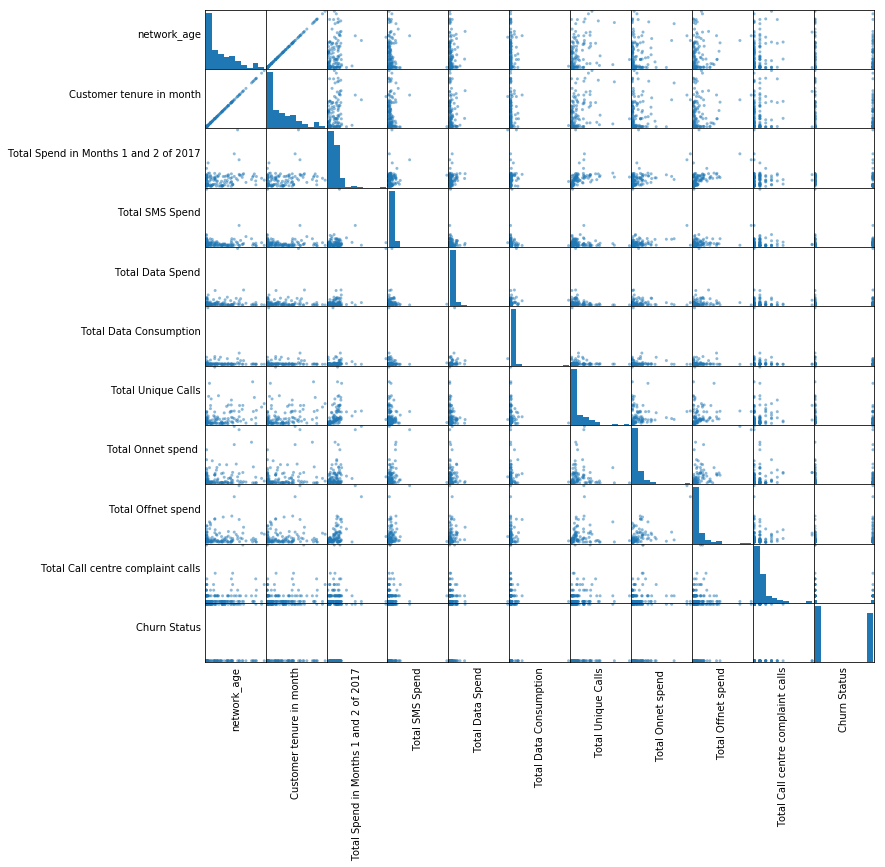

In [23]:
axs = pd.scatter_matrix(sampled_data, figsize=(12, 12))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

It’s hard to see. Let’s find correlation between independent variables and target variable.

It’s obvious that there aren’t highly correlated numeric variables. Therefore, we will keep all of them for the model.

In [24]:
import six
for i in CV_data.columns:
    if not( isinstance(CV_data.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to churn for => ", i, CV_data.stat.corr('Churn Status',i))

Correlation to churn for =>  network_age -0.12332144815007545
Correlation to churn for =>  Customer tenure in month -0.12331991661125695
Correlation to churn for =>  Total Spend in Months 1 and 2 of 2017 -0.029137321605371847
Correlation to churn for =>  Total SMS Spend 0.09946091822811771
Correlation to churn for =>  Total Data Spend 0.03656000071898986
Correlation to churn for =>  Total Data Consumption -0.1418576534362745
Correlation to churn for =>  Total Unique Calls -0.1335073937061599
Correlation to churn for =>  Total Onnet spend  -0.004495136304693974
Correlation to churn for =>  Total Offnet spend 0.1036987403772196
Correlation to churn for =>  Total Call centre complaint calls -0.07096324331424243
Correlation to churn for =>  Churn Status 1.0


The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median value tends to go up when the number of churners goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; the median value tends to go down when the percentage of the lower status of the population goes up. Finally, coefficients close to zero mean that there is no linear correlation.

We are going to keep all the variables, for now.

Preparing data for Machine Learning. And we need two columns only — features and label **(“Churn Status”):**

## Preparing Data for Machine Learning
The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column

### StringIndexer
StringIndexer encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), ordered by label frequencies, so the most frequent label gets index 0.

In [25]:
pd.DataFrame(CV_data.take(5), columns = CV_data.columns).transpose()

,0,1,2,3,4
Customer ID,ADF0039,ADF0041,ADF0051,ADF0059,ADF0060
network_age,123,1316,2385,1614,2175
Customer tenure in month,4.1,43.87,79.5,53.8,72.5
Total Spend in Months 1 and 2 of 2017,76.714,98.8904,372.63,530.2,554.13
Total SMS Spend,0,4.14,3.51,6.85,6.99
Total Data Spend,1.25,1.25,1.25,1.25,153.75
Total Data Consumption,1.4951,1.0244,6.0898,3.3447,673204
Total Unique Calls,14,27,119,69,33
Total Onnet spend,564,1626,10411,6822,3387
Total Offnet spend,6408,4373,22039,6274,7241


In [34]:
CV_data.dtypes

[('Customer ID', 'string'),
 ('network_age', 'int'),
 ('Customer tenure in month', 'double'),
 ('Total Spend in Months 1 and 2 of 2017', 'double'),
 ('Total SMS Spend', 'double'),
 ('Total Data Spend', 'double'),
 ('Total Data Consumption', 'double'),
 ('Total Unique Calls', 'int'),
 ('Total Onnet spend ', 'int'),
 ('Total Offnet spend', 'int'),
 ('Total Call centre complaint calls', 'int'),
 ('Network type subscription in Month 1', 'string'),
 ('Network type subscription in Month 2', 'string'),
 ('Most Loved Competitor network in in Month 1', 'string'),
 ('Most Loved Competitor network in in Month 2', 'string'),
 ('Churn Status', 'int')]

In [70]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [73]:
vecAssembler = VectorAssembler(inputCols = [ 'network_age', 'Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls', 'Total Offnet spend', 'Total Call centre complaint calls'], outputCol = 'features')

In [74]:
df_train = vecAssembler.transform(CV_data)

In [75]:
pd.DataFrame(df_train.take(5), columns = df_train.columns).transpose()

,0,1,2,3,4
Customer ID,ADF0039,ADF0041,ADF0051,ADF0059,ADF0060
network_age,123,1316,2385,1614,2175
Customer tenure in month,4.1,43.87,79.5,53.8,72.5
Total Spend in Months 1 and 2 of 2017,76.714,98.8904,372.63,530.2,554.13
Total SMS Spend,0,4.14,3.51,6.85,6.99
Total Data Spend,1.25,1.25,1.25,1.25,153.75
Total Data Consumption,1.4951,1.0244,6.0898,3.3447,673204
Total Unique Calls,14,27,119,69,33
Total Onnet spend,564,1626,10411,6822,3387
Total Offnet spend,6408,4373,22039,6274,7241


In [77]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol = 'Churn Status', featuresCol = 'features')

In [78]:
pipeline = Pipeline(stages=[vecAssembler, dt])

In [84]:
model = pipeline.fit(CV_data)

In [49]:
cols = CV_data.columns
CV_data.printSchema()

root
 |-- Customer ID: string (nullable = true)
 |-- network_age: integer (nullable = true)
 |-- Customer tenure in month: double (nullable = true)
 |-- Total Spend in Months 1 and 2 of 2017: double (nullable = true)
 |-- Total SMS Spend: double (nullable = true)
 |-- Total Data Spend: double (nullable = true)
 |-- Total Data Consumption: double (nullable = true)
 |-- Total Unique Calls: integer (nullable = true)
 |-- Total Onnet spend : integer (nullable = true)
 |-- Total Offnet spend: integer (nullable = true)
 |-- Total Call centre complaint calls: integer (nullable = true)
 |-- Network type subscription in Month 1: string (nullable = true)
 |-- Network type subscription in Month 2: string (nullable = true)
 |-- Most Loved Competitor network in in Month 1: string (nullable = true)
 |-- Most Loved Competitor network in in Month 2: string (nullable = true)
 |-- Churn Status: integer (nullable = true)



The above code basically indexes each categorical column using the StringIndexer, and then converts the indexed categories into one-hot encoded variables. The resulting output has the binary vectors appended to the end of each row.

Next, we will use the VectorAssembler to combine all the feature columns into a single vector column. This will include both the numeric columns and the one-hot encoded binary vector columns in our dataset.

### Pipeline

We use Pipeline to chain multiple Transformers and Estimators together to specify our machine learning workflow. A Pipeline’s stages are specified as an ordered array.

In [42]:
CV_data.head(2)

[Row(Customer ID='ADF0039', network_age=123, Customer tenure in month=4.1, Total Spend in Months 1 and 2 of 2017=76.714, Total SMS Spend=0.0, Total Data Spend=1.25, Total Data Consumption=1.4951, Total Unique Calls=14, Total Onnet spend =564, Total Offnet spend=6408, Total Call centre complaint calls=2, Network type subscription in Month 1='2G', Network type subscription in Month 2='2G', Most Loved Competitor network in in Month 1='Uxaa', Most Loved Competitor network in in Month 2='Mango', Churn Status=0),
 Row(Customer ID='ADF0041', network_age=1316, Customer tenure in month=43.87, Total Spend in Months 1 and 2 of 2017=98.8904, Total SMS Spend=4.14, Total Data Spend=1.25, Total Data Consumption=1.0244, Total Unique Calls=27, Total Onnet spend =1626, Total Offnet spend=4373, Total Call centre complaint calls=1, Network type subscription in Month 1='2G', Network type subscription in Month 2='2G', Most Loved Competitor network in in Month 1='Uxaa', Most Loved Competitor network in in Mo

In [56]:
print("Training Dataset Count: " + str(CV_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 1401
Test Dataset Count: 600


In [81]:
model = pipeline.fit(CV_data)

In [42]:
predictions = model.transform(test_data)

In [43]:
predictions.select('prediction', 'Churn', 'features').toPandas().head(20)

,prediction,Churn,features
0,0.0,0.0,"[117.0, 0.0, 0.0, 0.0, 184.5, 97.0, 351.6, 80...."
1,1.0,1.0,"[65.0, 0.0, 0.0, 0.0, 129.1, 137.0, 228.5, 83...."
2,1.0,1.0,"[161.0, 0.0, 0.0, 0.0, 332.9, 67.0, 317.8, 97...."
3,0.0,0.0,"[111.0, 0.0, 0.0, 0.0, 110.4, 103.0, 137.3, 10..."
4,0.0,0.0,"[49.0, 0.0, 0.0, 0.0, 119.3, 117.0, 215.1, 109..."
5,0.0,0.0,"[36.0, 0.0, 1.0, 30.0, 146.3, 128.0, 162.5, 80..."
6,0.0,0.0,"[65.0, 0.0, 0.0, 0.0, 211.3, 120.0, 162.6, 122..."
7,0.0,1.0,"[119.0, 0.0, 0.0, 0.0, 159.1, 114.0, 231.3, 11..."
8,0.0,0.0,"[10.0, 0.0, 0.0, 0.0, 186.1, 112.0, 190.2, 66...."
9,0.0,0.0,"[68.0, 0.0, 0.0, 0.0, 148.8, 70.0, 246.5, 164...."


In [44]:
evaluator = BinaryClassificationEvaluator(labelCol = 'Churn', rawPredictionCol='prediction')

In [45]:
evaluator.evaluate(predictions)

0.8184302539565699

In [83]:
tt = time() - t0

print("Whole NoteBook Running time {} seconds".format(round(tt,3)))

Whole NoteBook Running time 364.503 seconds
